# Importing libraries

In [1]:
# import time to find consuming steps
import time
start = time.time()

# utility libraries
import numpy as np
import igraph as ig
import pandas as pd
import csv
import re

# plotting stuffs
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sb

end = time.time()
print('Loading libraries takes %.4f s' % (end-start))

Loading libraries takes 0.8530 s


# Utility functions

In [2]:
def build_graph(nodes, edges):
    '''
    Build a graph using igraph library
    
    Parameters
    ----------
    nodes: a list of nodes
    edges: a list of tuples (source, target)
    
    Returns
    -------
    a graph g
    '''
    g = ig.Graph(directed=False) # create an undirected graph
    g.add_vertices(nodes) # add nodes
    g.add_edges(edges) # add edges
    
    # beware of multiple edges in the graph --> remove all redundant edges between the same pairs of vertices
    multiple_edges = [e for e in edges if g.is_multiple(e)]
    g.delete_edges(multiple_edges)
    
    return g

# Loading data

In [3]:
path_data = '../data/' # path to the data
path_submission = '../submission/' # path to submission files

In [4]:
# ====== read in node informations ====== #
start = time.time()

with open(path_data + 'node_information.csv', 'r') as f:
    reader = csv.reader(f)
    node_info = list(reader)

end = time.time()
print('Reading node information takes %.4f s' % (end-start))

Reading node information takes 0.2290 s


In [5]:
# ====== read training data as str ====== #
start = time.time()

training = np.genfromtxt(path_data + 'training_set.txt', dtype=str)

end = time.time()
print('Reading training set takes %.4f s' % (end-start))

Reading training set takes 2.6910 s


In [6]:
# ====== building the graph ====== #
start = time.time()

edges = [(element[0], element[1]) for element in training if int(element[2]) == 1] # extract all the edges
nodes = [element[0] for element in node_info] # extract all the vertices

g = build_graph(nodes, edges) # build the graph

print('Number of vertices: %d' % len(g.vs))
print('Number of edges: %d' % len(g.es))

end = time.time()
print('Building the citation graph takes %.4f minutes' % ((end-start)%60))

Number of vertices: 27770
Number of edges: 334690
Building the citation graph takes 23.3570 minutes


# Analysis

First, we examine the degree distribution of the graph, by creating a dictinary whose key is the degree and value is the number of nodes with associated degree. Since the graph is undirected, there is no distinction between in-degree or out-degree.

In [7]:
dict_deg = {} # a dictionary of (degree : number of vertices)
for v in g.vs:
    deg = g.degree(v)
    if deg not in dict_deg.keys():
        dict_deg[deg] = 1
    else:
        dict_deg[deg] += 1

degrees, counts = dict_deg.keys(), dict_deg.values()

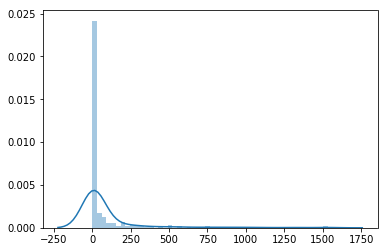

In [8]:
sb.distplot(counts)

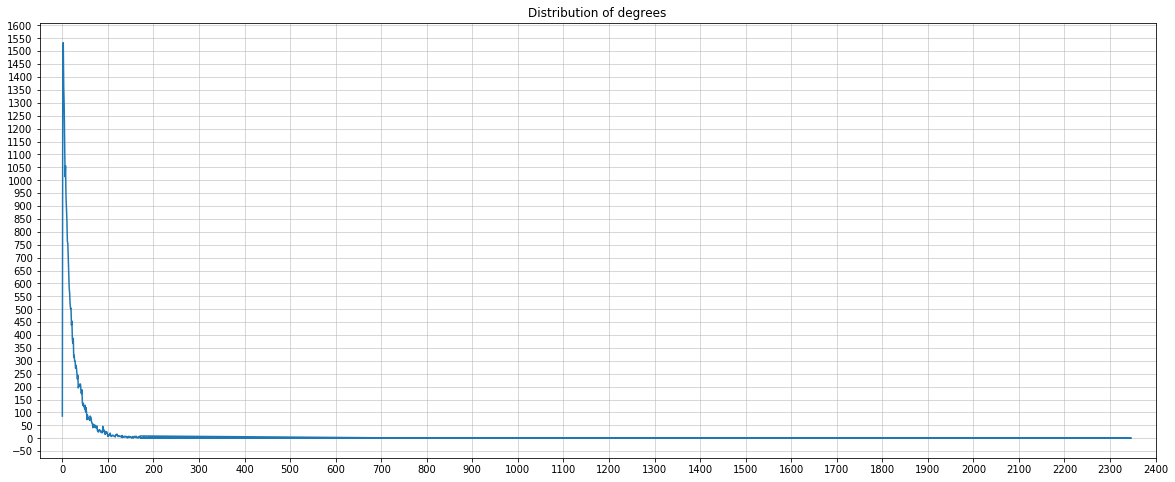

In [9]:
fix, ax = plt.subplots(figsize=(20,8))
ax.set_title('Distribution of degrees')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50))
ax.set_xlim([-50,2400])
ax.grid(axis='both', linestyle='-', linewidth=0.5)
ax.plot(degrees, counts)

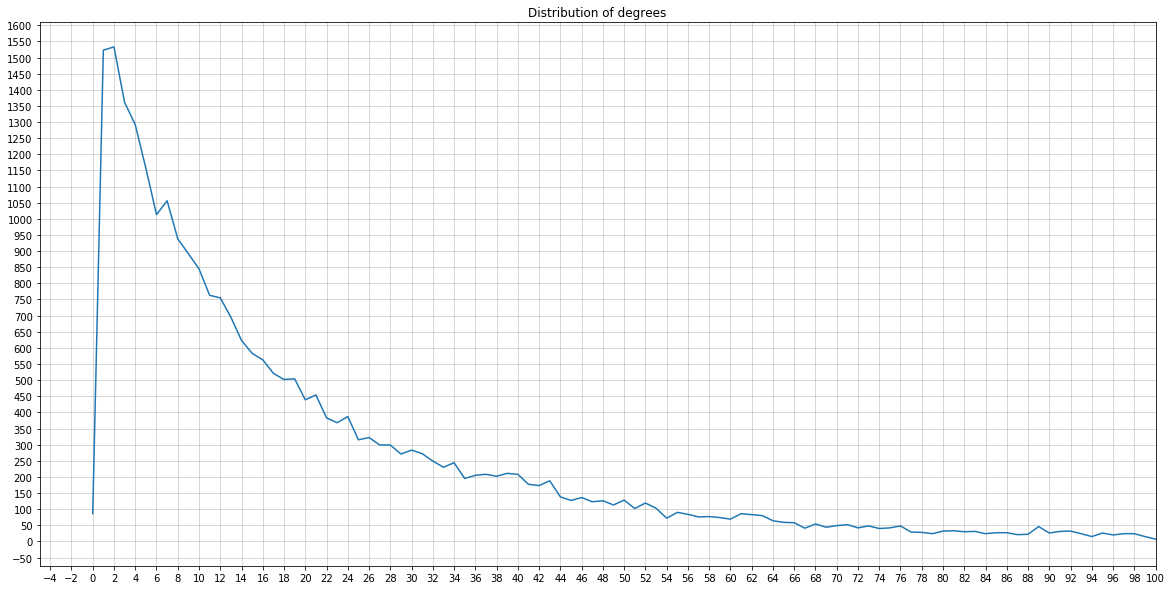

In [10]:
fix, ax = plt.subplots(figsize=(20,10))
ax.set_title('Distribution of degrees')
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=50))
ax.set_xlim([-5,100])
ax.grid(axis='both', linestyle='-', linewidth=0.5)
ax.plot(degrees, counts)

# Closeness centrality

In [11]:
# ====== read in the closeness feature ====== #
start = time.time()

closeness = pd.read_csv(path_data + 'closeness_feature.csv')

end = time.time()
print('Reading closeness information takes %.4f s' % (end-start))

Reading closeness information takes 0.0210 s


In [12]:
nodes_closeness = closeness['name']
cls = closeness['closeness']

In [13]:
# sb.distplot(cls)

In [23]:
# ====== find the community structures ====== #
start = time.time()

dendogram = g.community_fastgreedy()

end = time.time()
print('Finding community takes %.4f s' % (end-start))

Finding community takes 110.6980 s
